In [1]:
import random

train_data = []
folder = 'TRAIN'
NN = 5000

for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        for i in range(1,NN+1,1):
            # Define the path to your text file
            file_path = f'{folder}\\TimeSeries_{p}_{q}\\ts_{i}.txt'

            # Read data from the text file
            with open(file_path, 'r') as file:
                data = file.read().strip().split()  # Split the string into individual values
                # Convert data to floats
                ts_data = [float(val) for val in data]
                
            train_data.append([ts_data,p,q])

    print(f'{p} - Done')

0 - Done
1 - Done
2 - Done
3 - Done
4 - Done
5 - Done


In [2]:
import random

test_data = []
folder = 'TEST'
NN = 500

for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        for i in range(1,NN+1,1):
            # Define the path to your text file
            file_path = f'{folder}\\TimeSeries_{p}_{q}\\ts_{i}.txt'

            # Read data from the text file
            with open(file_path, 'r') as file:
                data = file.read().strip().split()  # Split the string into individual values
                # Convert data to floats
                ts_data = [float(val) for val in data]

            test_data.append([ts_data,p,q])
    print(f'{p} - Done')

0 - Done
1 - Done
2 - Done
3 - Done
4 - Done
5 - Done


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

# Assuming you have already loaded your dataset into variables X_train, y_train, X_test, y_test

# Preprocess the data
X_train = np.array([value[0] for value in train_data])  # ACF and PACF lags
y_train = np.array([[value[1],value[2]]for value in train_data])  # p and q values
X_test = np.array([test_value[0] for test_value in test_data])
y_test = np.array([[test_value[1],test_value[2]] for test_value in test_data])

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (180000, 1000)
Shape of X_test: (18000, 1000)


In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

# Normalize the input features (each feature independently)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

print("Shape of X_train reshaped:", X_train.shape)

# Normalize the input features (each feature independently)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Reshape the input data for LSTM
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Shape of X_test reshaped:", X_test.shape)

Shape of X_train reshaped: (180000, 1000, 1)
Shape of X_test reshaped: (18000, 1000, 1)


In [5]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2))  # Output layer with 2 neurons for p and q
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

C:\Users\gfrei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1129s 393ms/step - loss: 2.9620 - val_loss: 2.1453
Epoch 2/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1058s 376ms/step - loss: 2.0494 - val_loss: 1.9759
Epoch 3/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1069s 380ms/step - loss: 1.9327 - val_loss: 2.0004
Epoch 4/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1081s 384ms/step - loss: 1.8572 - val_loss: 1.8194
Epoch 5/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1091s 388ms/step - loss: 1.7657 - val_loss: 1.6534
Epoch 6/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1076s 382ms/step - loss: 1.6089 - val_loss: 1.5920
Epoch 7/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1073s 381ms/step - loss: 1.4923 - val_loss: 1.4151
Epoch 8/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1051s 374ms/step - loss: 1.3601 - val_loss: 1.6664
Epoch 9/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1079s 383ms/step - loss: 1.2854 - val_loss: 1.2838
Epoch 10/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1080s 384ms/step - loss: 1.2016 - val_loss: 1.3810
Epoch 11/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1086s 386ms/ste

In [6]:
from keras.models import save_model

# Define the file paths for saving the model architecture and weights
architecture_path = 'naive_time_series.json'
weights_path = 'naive_time_series.weights.h5'  # Adjusted filename

# Save the model architecture as JSON
model_architecture = model.to_json()
with open(architecture_path, 'w') as json_file:
    json_file.write(model_architecture)

# Save the model weights
model.save_weights(weights_path)

print("Model architecture and weights saved successfully.")


Model architecture and weights saved successfully.


In [7]:
from keras.models import model_from_json

# Define the file paths for the saved model architecture and weights
architecture_path = 'naive_time_series.json'
weights_path = 'naive_time_series.weights.h5'

# Load the model architecture from JSON
with open(architecture_path, 'r') as json_file:
    loaded_model_json = json_file.read()

# Reconstruct the model from the architecture
loaded_model = model_from_json(loaded_model_json)

# Load the model weights into the reconstructed model
loaded_model.load_weights(weights_path)

print("Model architecture and weights loaded successfully.")


Model architecture and weights loaded successfully.


In [8]:
import numpy as np
X_test = np.array([test_value[0] for test_value in test_data])
y_test = np.array([[test_value[1],test_value[2]] for test_value in test_data])
# Use the trained model to make predictions on the test data
predictions = loaded_model.predict(X_test)

# Round the predictions to the nearest integer (if applicable)
# Assuming your predictions are for classification
rounded_predictions = np.round(predictions)

# Calculate accuracy
accuracy = np.mean(np.all(rounded_predictions == y_test, axis=1))
print("Accuracy:", accuracy)

563/563 ━━━━━━━━━━━━━━━━━━━━ 62s 110ms/step
Accuracy: 0.030944444444444445


In [9]:
import numpy as np

# Apply ceil, floor, and sigmoid functions to predictions
ceil_predictions = np.ceil(predictions)
floor_predictions = np.floor(predictions)

# Round each set of predictions
rounded_ceil_predictions = abs(ceil_predictions).astype(int)
rounded_floor_predictions = abs(floor_predictions).astype(int)

# Calculate accuracy for each set of predictions
accuracy_ceil = np.mean(np.all(rounded_ceil_predictions == y_test, axis=1))
accuracy_floor = np.mean(np.all(rounded_floor_predictions == y_test, axis=1))

print("Accuracy with ceil:", accuracy_ceil)
print("Accuracy with floor:", accuracy_floor)


Accuracy with ceil: 0.016777777777777777
Accuracy with floor: 0.034


In [12]:
# data frame with collumns 1,2,3,4,5 and rows 1,2,3,4,5
import pandas as pd
df = pd.DataFrame(columns = [0,1,2,3,4,5], index = [0,1,2,3,4,5])
#pd.set_option('future.no_silent_downcasting', True)
df = df.fillna(0).infer_objects(copy=False)
for i in range(len(y_test)):
    p_test = y_test[i][0]
    q_test = y_test[i][1]
    p_pred = rounded_predictions[i][0]
    q_pred = rounded_predictions[i][1]
    if(p_test == p_pred and q_test == q_pred):
        df.loc[p_test,q_test] += 1
df = round(df/500*100,2)
df

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.2,1.6,1.8,0.0
4,0.0,0.4,1.4,3.4,7.6,0.0
5,0.0,2.4,14.8,10.6,66.2,1.0


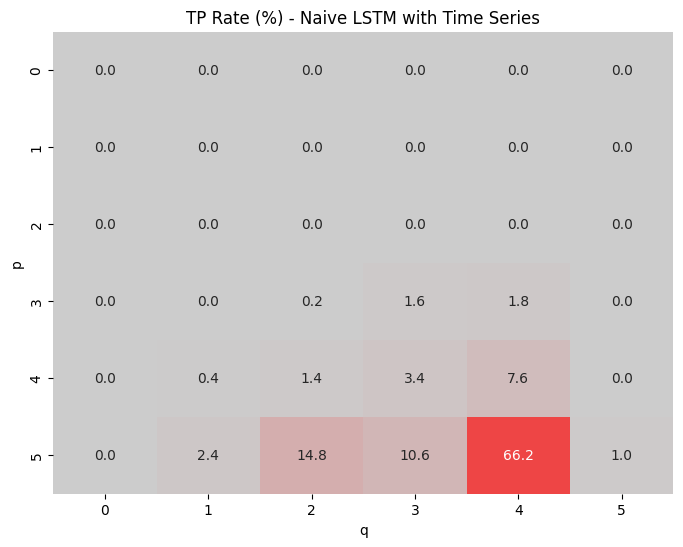

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap from light gray to red
colors = [(0.8, 0.8, 0.8), (1, 0, 0)]  # Light Gray to Red
cmap_name = 'light_gray_to_red'
n_bins = 10**5  # Discretization of the colormap
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a heatmap with custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap=custom_cmap, fmt='.1f', vmin=0, vmax=100, cbar=False)
plt.title('TP Rate (%) - Naive LSTM with Time Series')
plt.xlabel('q')
plt.ylabel('p')
# Save the plot to a PDF file
plt.savefig('naive_TS.pdf')
plt.show()